In [3]:
# Predicting heart disease using machine learning

# 1. Problem definition
# Given clinical parameters about a patient, can we predict whether or not they have heart disease ?

# 2. Data
# The orginal data came from the Cleavland data from the UCI Machine Learning Repository.
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease


# 3. Evaluation
# If we can reach 95% accurancy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features
# This is where you'll get different information about each of the features in your data.

# 5. Modeling


# 6. Experimentation



In [1]:
# Preparing the tools
# We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

# Regular EDA (Exploratory data analysis) and plotting libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [2]:
df = pd.read_csv("heart-disease.csv")

In [13]:
# Data Exploration (exploratory data analysis or EDA)

# The goal here is to find out more about data and become a subject matter export on the dataset you're working with

# 1. What question(s) are you trying to solve ?
# 2. What kind of data do we have and how do we treat different types ?
# 3. What's missing from the data and how do you deal with it ?
# 4. Where are the outliers and why should you care about them ?
# 5. How can you add, chagne or remove features to get more out of your data ?

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# Let's find out how many of each class there
df["target"].value_counts()


1    165
0    138
Name: target, dtype: int64

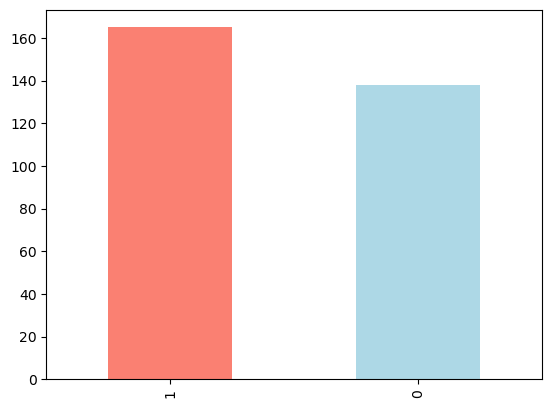

In [18]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
# Are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
### Heart Disease Frequency according to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [25]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

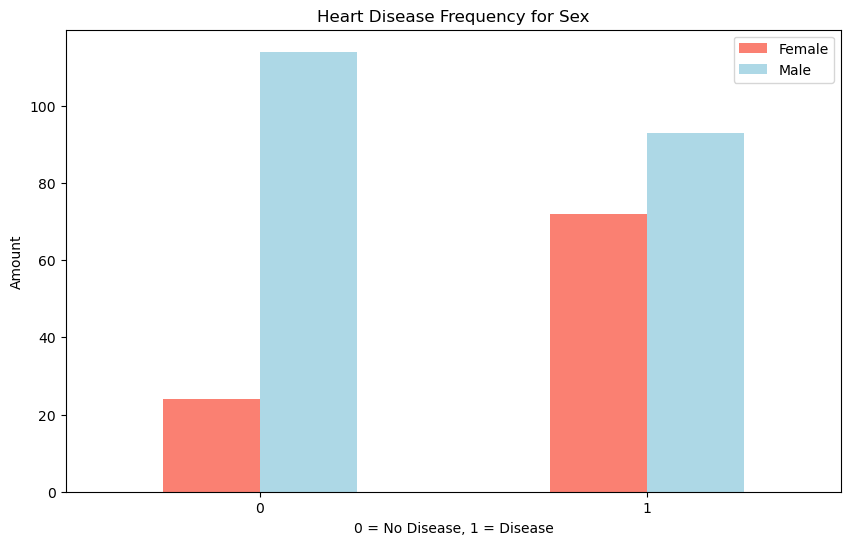

In [32]:
# Create a plt of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6), color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)


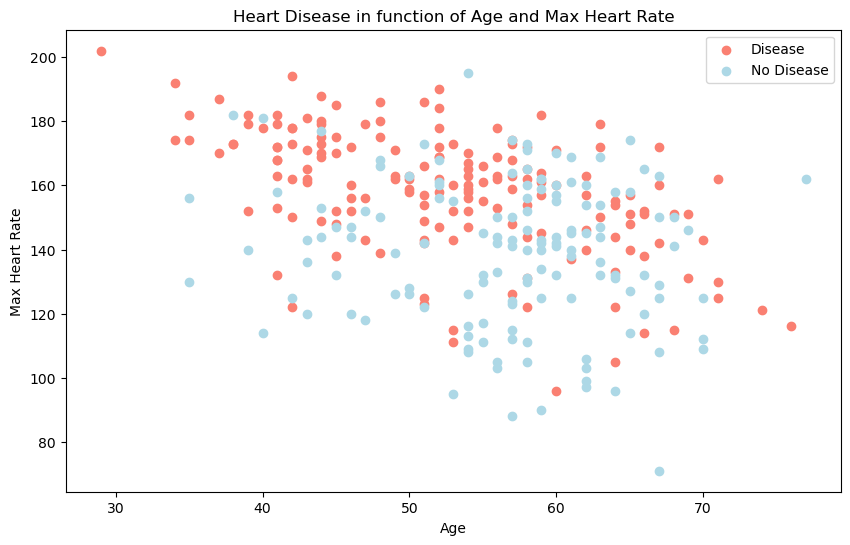

In [37]:
### Age vs Max Heart Rate for Heart Disease
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive examples

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

# Scatter with negative examples

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")


# Add some helpful info

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<AxesSubplot: ylabel='Frequency'>

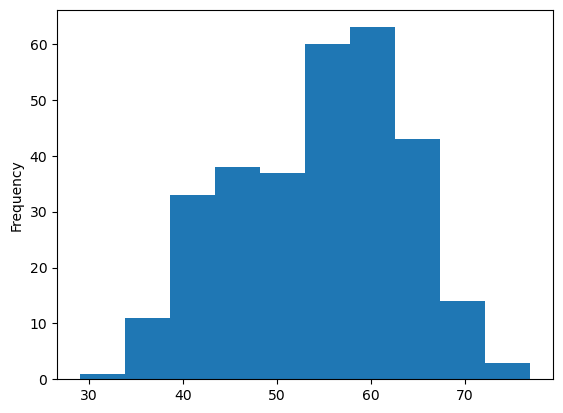

In [38]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

In [39]:
# Heart Disease Frequency per Chest Pain Type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot: xlabel='cp'>

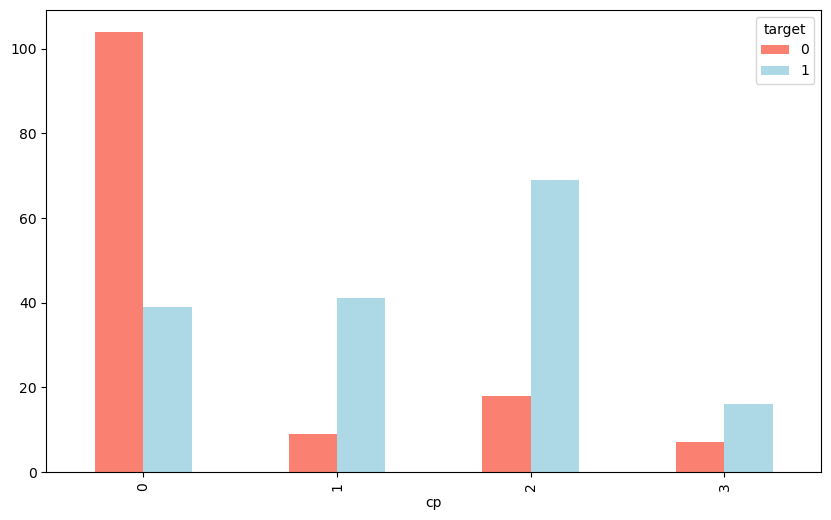

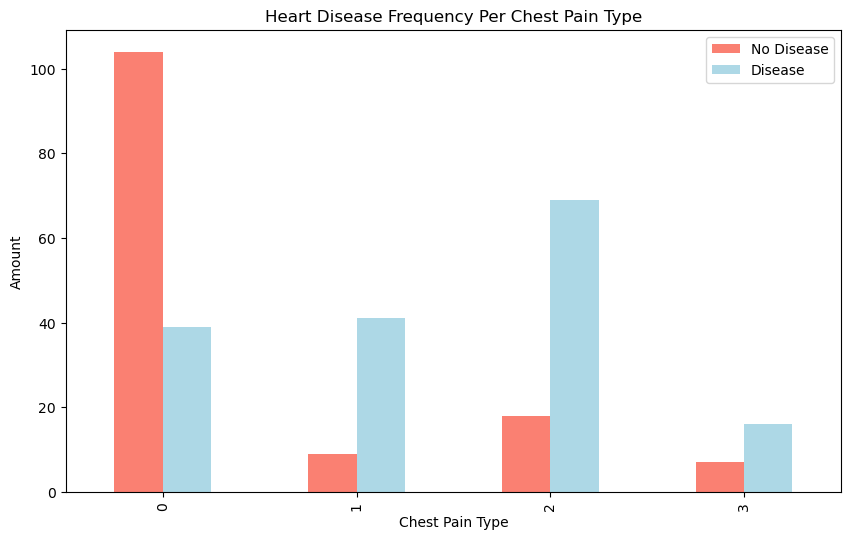

In [46]:
# Make the crosstabk more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])

In [47]:
# Make a correlation matrix

In [48]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

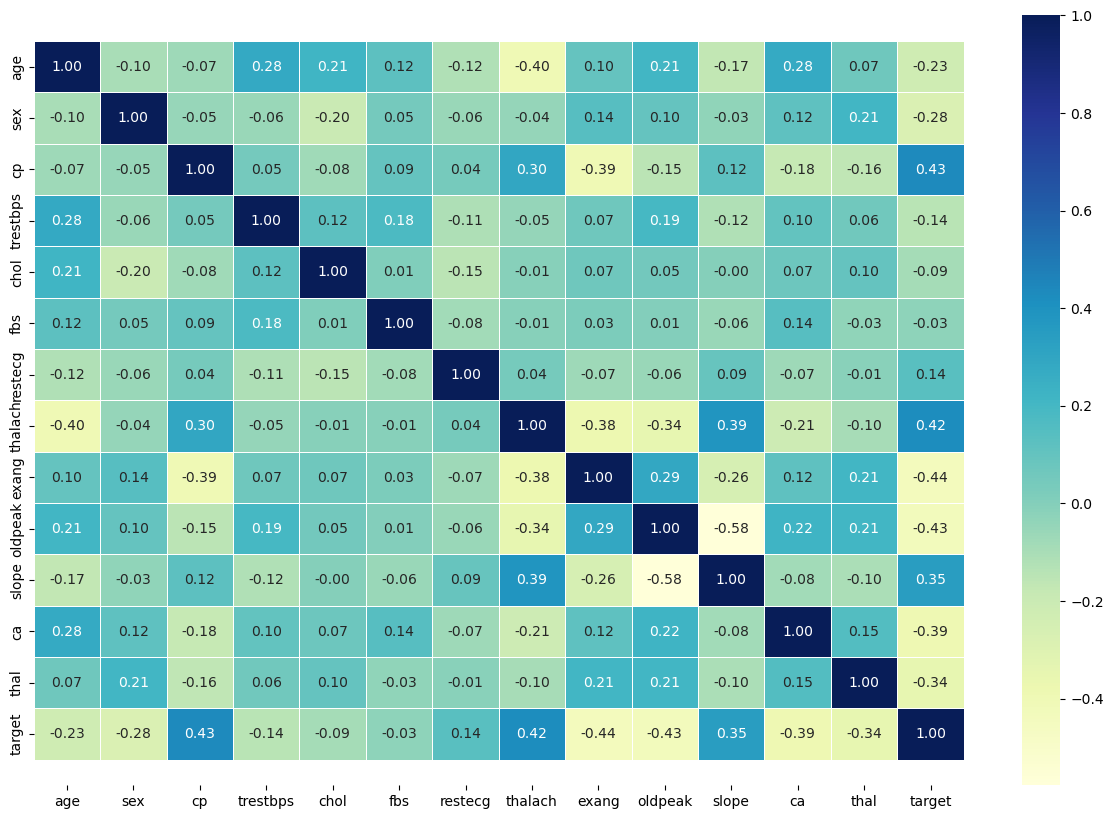

In [57]:
# Let's make our correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
# Split data into train and test set
np.random.seed(42)


# Split into train & test set

X = df.drop("target",axis=1)
y = df["target"]

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

  Now we've got our data into training and test sets
  
  We'll train it (find the patterns) on the training set.
  
 And we'll test it (use the patterns) on the test set.
 
 We're going to try 3 different machine learning models:
 
 1. Logistic Regression
 2. k-Nearest Neighbours Classifier
 3. Random Forest Classifier


In [10]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
     
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    
    model_scores = {}
    
    # Loop through models 
    for name, model in models.items():
        
        model.fit(X_train,y_train)
        
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
    

In [11]:
models_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
models_scores

C:\Users\Jakub\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot: >

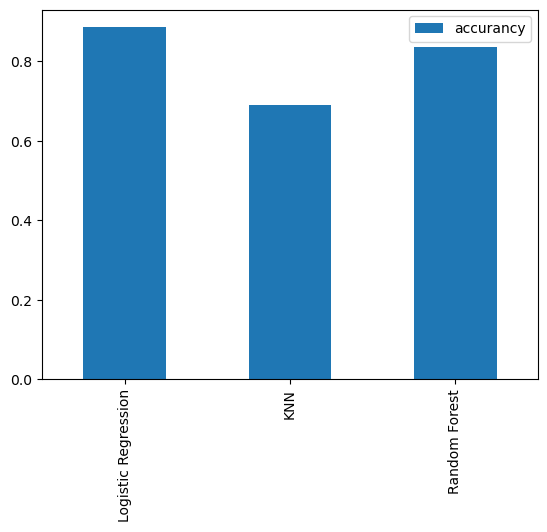

In [12]:
### Model Comparison
model_compare = pd.DataFrame(models_scores, index=["accurancy"])
model_compare.T.plot.bar()

Now we've got a baseline model...And we know a model's first predictions aren't always what we should based our next steps off. What should do ?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [13]:
# let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn= KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
        
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
        # update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [14]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


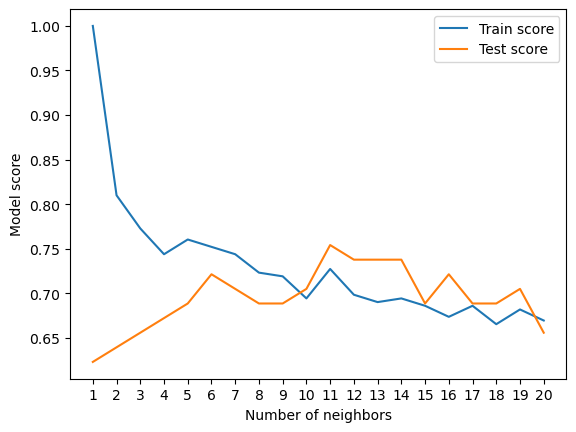

In [15]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
...Using RandomizedSearchCV

In [16]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),"solver": ["liblinear"]}


# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split": np.arange(2,20,2),"min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [17]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

model = LogisticRegression()
rs_log_reg = RandomizedSearchCV(estimator=model,param_distributions=log_reg_grid,cv=5, n_iter=20,verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [18]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [19]:
# Evaluate the randomized search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), Let's do the same for RandomForestClassifier()

In [26]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
model = RandomForestClassifier()
rs_rf = RandomizedSearchCV(estimator=model,param_distributions=rf_grid,cv=5, n_iter=20, verbose=True)
rs_rf

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
# Find the best hyperparameterss
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [24]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

# Evaluating our tuned machine learning classifier, beyond accurancy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To mak comparisons and evaluate our trained model, first we need to make predictions.

In [29]:
# make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

In [30]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
# PLot ROC curve and calculate AUC metric
from sklearn import metrics

C:\Users\Jakub\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


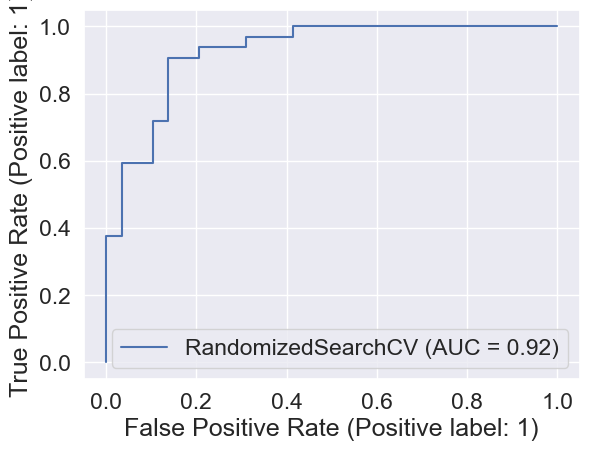

In [49]:
metrics.plot_roc_curve(rs_log_reg,X_test, y_test)

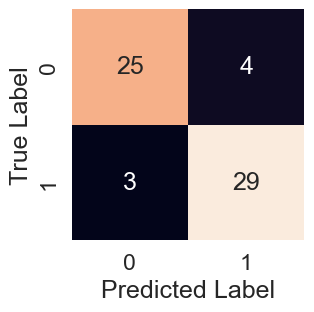

In [44]:
# Confusion matrix

import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, and AUC metric and a confusion matrix

let's get a classification report as well as cross-validated precision, recall and f1-score

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using cross-validation

We're going to calculate accurancy, precision, recall and f1-score of our model using cross-validation and do so we'll be using cross_val_score()

In [51]:
# Check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.23357214690901212,solver="liblinear")

In [70]:
# Cross-validated accurancy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc = cv_acc.mean()

In [71]:
# Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision = cv_precision.mean()

In [72]:
# Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall = cv_recall.mean()

In [77]:
# Cross-validated F1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9272727272727274

<AxesSubplot: title={'center': 'Cross-validated classification metrics'}>

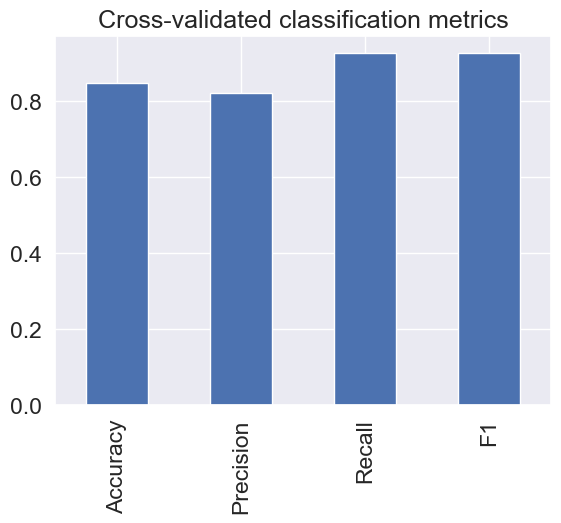

In [81]:
# Visualize cross-validated metrics
cv_meatrics = pd.DataFrame({"Accuracy": cv_acc,
                             "Precision": cv_precision,
                              "Recall": cv_recall,
                           "F1": cv_f1},index=[0])
cv_meatrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for
(MODEL NAME) feature importance.

Let's find the feature importance for our LogisticRegression model...

In [85]:
# Fit an instance of LogisticRegression
rs_log_reg.best_params_

clf = LogisticRegression(C= 0.23357214690901212,solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [88]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490195,  0.02472938, -0.63120405, -0.57590942,
         0.47095136, -0.65165348, -0.69984206]])

In [91]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220351664148,
 'sex': -0.9042408930260735,
 'cp': 0.6747282624694215,
 'trestbps': -0.011613401789010375,
 'chol': -0.0017036441780094993,
 'fbs': 0.047876883382302414,
 'restecg': 0.3349019539205334,
 'thalach': 0.024729383396378347,
 'exang': -0.6312040510578483,
 'oldpeak': -0.5759094230155162,
 'slope': 0.47095135616471195,
 'ca': -0.6516534832909596,
 'thal': -0.6998420628111434}

<AxesSubplot: title={'center': 'Feature Importance'}>

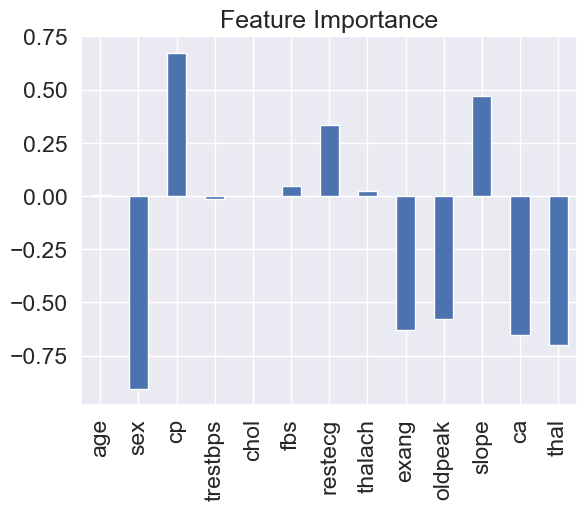

In [92]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (3936813206.py, line 1)

In [ ]:
|